1. **Instalasi Library:**
   - `!pip install tensorflow`: Menginstal TensorFlow, sebuah library machine learning yang sering digunakan.
   - `!pip install tensorflow numpy matplotlib`: Menginstal TensorFlow, NumPy (library untuk manipulasi array), dan Matplotlib (library untuk plotting grafik).
   - `!pip install gdown`: Menginstal gdown, library untuk mengunduh file dari Google Drive.
   - `!pip install rarfile`: Menginstal rarfile, library untuk menangani file RAR.

2. **Import Library:**
   - `import numpy as np`: Mengimpor NumPy dengan alias np untuk memudahkan penggunaan.
   - `import gdown`: Mengimpor library gdown untuk mengunduh file dari Google Drive.
   - `import os`: Mengimpor library os untuk berinteraksi dengan sistem operasi.
   - `import rarfile`: Mengimpor library rarfile untuk menangani file RAR.
   - `import tensorflow as tf`: Mengimpor TensorFlow.
   - `from tensorflow.keras.models import load_model`: Mengimpor fungsi load_model dari submodule models di TensorFlow Keras.
   - `from google.colab import files`: Mengimpor fungsi files dari library google.colab untuk berinteraksi dengan file di Google Colab.
   - `from IPython.display import Image`: Mengimpor fungsi Image dari IPython.display untuk menampilkan gambar.
   - `from tensorflow.keras.preprocessing import image`: Mengimpor modul image dari TensorFlow Keras untuk pra-pemrosesan gambar.
   - `from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions`: Mengimpor fungsi pra-pemrosesan dan dekode dari model VGG16 di TensorFlow Keras.
   - `from tensorflow.keras.models import Sequential`: Mengimpor kelas Sequential dari TensorFlow Keras untuk membuat model sekuensial.
   - `from tensorflow.keras.layers import Dense, Flatten`: Mengimpor layer Dense dan Flatten dari TensorFlow Keras.
   - `from tensorflow.keras.applications import VGG16`: Mengimpor model VGG16 dari TensorFlow Keras.
   - `from tensorflow.keras.preprocessing.image import ImageDataGenerator`: Mengimpor ImageDataGenerator dari TensorFlow Keras untuk augmentasi gambar.

In [1]:
!pip install tensorflow
!pip install tensorflow numpy matplotlib
!pip install gdown
!pip install rarfile
import numpy as np
import gdown
import os
import rarfile
import tensorflow as tf
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
file_id = "1gNvirgd9TZCnIUxBSNyDJg-8-Bel8jN7"
url = f"https://drive.google.com/uc?id={file_id}"
output = "dataset.rar"

gdown.download(url, output, quiet=False)

with rarfile.RarFile(output, 'r') as archive:
    archive.extractall("dataset_folder")


Downloading...
From: https://drive.google.com/uc?id=1gNvirgd9TZCnIUxBSNyDJg-8-Bel8jN7
To: /content/dataset.rar
100%|██████████| 78.8M/78.8M [00:03<00:00, 24.0MB/s]


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ganti 'path/to/dataset_folder' dengan path yang benar ke direktori gambar di Google Colab Anda
data_dir = "/content/dataset_folder/dataset"

# Definisikan ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Proporsi data untuk validasi
)

# Menggunakan ImageDataGenerator untuk memuat dan mengatur ulang data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Bagian data untuk pelatihan
    shuffle=True  # Anda bisa memilih untuk mengacak data atau tidak
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Bagian data untuk validasi
    shuffle=True  # Anda bisa memilih untuk mengacak data atau tidak
)


Found 2269 images belonging to 10 classes.
Found 562 images belonging to 10 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Membuat model dengan VGG16 sebagai lapisan basis
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Membangun model
model = Sequential()

# Menambahkan lapisan VGG16 sebagai lapisan basis
model.add(base_model)

# Menambahkan lapisan Flatten untuk mengubah output dari VGG16 menjadi vektor 1D
model.add(Flatten())

# Menambahkan lapisan Dense dengan 256 neuron dan fungsi aktivasi ReLU
model.add(Dense(256, activation='relu'))

# Menambahkan lapisan Dense dengan jumlah kelas Anda dan fungsi aktivasi softmax
model.add(Dense(10, activation='softmax'))  # Sesuaikan dengan jumlah kelas Anda

# Setelah membangun model, mematikan pembelajaran untuk lapisan basis (VGG16)
for layer in base_model.layers:
    layer.trainable = False

# Menampilkan ringkasan model
model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 21140042 (80.64 MB)
Trainable params: 6425354 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [5]:
from tensorflow.keras.callbacks import Callback, EarlyStopping

class CustomEarlyStopping(Callback):
    def __init__(self, monitor='accuracy', min_accuracy=0.98, patience=3, verbose=1):
        super(CustomEarlyStopping, self).__init__()
        self.monitor = monitor
        self.min_accuracy = min_accuracy
        self.patience = patience
        self.verbose = verbose
        self.counter = 0

    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get(self.monitor)

        # Check if current accuracy meets the specified threshold
        if current_accuracy is not None and current_accuracy >= self.min_accuracy:
            if self.verbose > 0:
                print(f"\nEpoch {epoch + 1}: Stopping training as {self.monitor} has reached {current_accuracy}")
            self.model.stop_training = True
        else:
            self.counter += 1
            if self.verbose > 0:
                print(f"\nEpoch {epoch + 1}: {self.monitor} did not reach the desired accuracy.")

            # Check if the counter exceeds patience
            if self.counter >= self.patience:
                if self.verbose > 0:
                    print(f"\nTraining stopped after {self.patience} epochs without improvement.")
                self.model.stop_training = True



Epoch 1/50
71/71 [==============================] - ETA: 0s - loss: 1.8799 - accuracy: 0.5967
Epoch 1: accuracy did not reach the desired accuracy.
71/71 [==============================] - 68s 773ms/step - loss: 1.8799 - accuracy: 0.5967 - val_loss: 0.5358 - val_accuracy: 0.8416
Epoch 2/50
71/71 [==============================] - ETA: 0s - loss: 0.4593 - accuracy: 0.8603
Epoch 2: accuracy did not reach the desired accuracy.
71/71 [==============================] - 42s 589ms/step - loss: 0.4593 - accuracy: 0.8603 - val_loss: 0.4750 - val_accuracy: 0.8505
Epoch 3/50
71/71 [==============================] - ETA: 0s - loss: 0.3076 - accuracy: 0.9061
Epoch 3: accuracy did not reach the desired accuracy.

Training stopped after 3 epochs without improvement.
18/18 [==============================] - 7s 391ms/step - loss: 0.3416 - accuracy: 0.8915
Validation Accuracy: 0.891459047794342


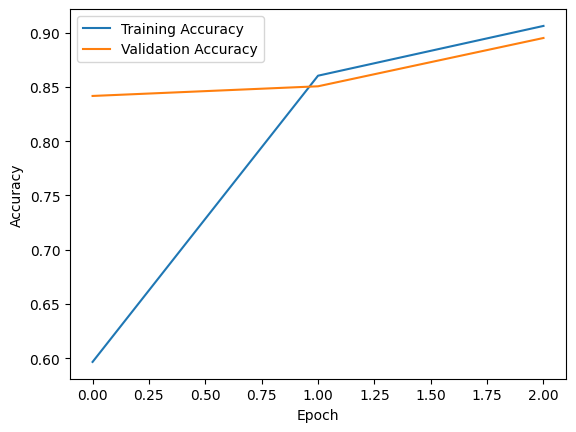

In [6]:
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

custom_early_stopping = CustomEarlyStopping(monitor='accuracy', min_accuracy=0.98, patience=3, verbose=1)

early_stopping = EarlyStopping(monitor='accuracy', patience=5, verbose=1)

# Melatih model menggunakan generator
# history = model.fit(train_generator, epochs=20, validation_data=validation_generator)
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[custom_early_stopping, early_stopping]  # Menambahkan callback custom dan callback bawaan
)

# Evaluasi model pada data validasi
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy}')

# Plot kurva pelatihan dan validasi
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
model.save('toymodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
model = load_model('toymodel.h5')  # Ganti dengan path model Anda

# Function to process the uploaded image and make a prediction
def process_uploaded_image(file_path):
    # Load and preprocess the image
    img = image.load_img(file_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make prediction
    prediction = model.predict(img_array)

    # Display the result
    predicted_class = np.argmax(prediction)
    print(f'Predicted Class Index: {predicted_class}')

# Upload image files
uploaded_files = files.upload()

# Process and make predictions for each uploaded file
for file_name in uploaded_files.keys():
    file_path = file_name
    Image(file_path)  # Display the uploaded image
    process_uploaded_image(file_path)

Saving download (7).jpg to download (7).jpg
1/1 [==============================] - 0s 202ms/step
Predicted Class Index: 5
